In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
from collections import defaultdict

# Define a function to calculate the IoU (Intersection over Union) between two bounding boxes
def calculate_iou(boxA, boxB):
    # boxA and boxB are in the format [x1, y1, x2, y2]
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    inter_area = max(0, xB - xA +1) * max(0, yB - yA +1)

    boxA_area = (boxA[2] - boxA[0] +1) * (boxA[3] - boxA[1] +1)
    boxB_area = (boxB[2] - boxB[0] +1) * (boxB[3] - boxB[1] +1)

    iou = inter_area / float(boxA_area + boxB_area - inter_area)

    return iou

# Define ground truth bounding boxes and predicted bounding boxes (as examples)
# For simplicity, assuming each bounding box is represented by [x1, y1, x2, y2]
# where (x1, y1) is the top-left coordinate and (x2, y2) is the bottom-right coordinate
ground_truth_boxes = [[473.0, 370.0, 554.0, 470.0], [350.0, 468.0, 432.0, 589.0], [354.0, 414.0, 426.0, 491.0], [458.0, 213.0, 510.0, 285.0], [424.0, 97.0, 487.0, 189.0], [411.0, 6.0, 477.0, 72.0], [441.0, 48.0, 507.0, 112.0], [466.0, 92.0, 509.0, 173.0]]
#  [
#     #[10, 20, 50, 70],
#     #[80, 10, 100, 50],
#     # Add more ground truth boxes as needed
#     [473,370,554,470],
#     [350,468,432,589],
#     [354,414,426,491],
#     [458,213,510,285],
#     [424,97,487,189],
#     [411,6,477,72],
#     [441,48,507,112],
#     [466,92,509,173]
# ]


predicted_boxes=[[473.6744, 369.11549999999994, 554.9976, 468.0261], [348.46680000000003, 468.24090000000007, 429.55240000000003, 589.6047000000001], [421.92447999999996, 94.31429999999999, 487.64992, 187.22129999999999], [412.40052, 3.466619999999999, 477.38668, 71.79642000000001], [460.37504, 211.86599999999999, 510.39135999999996, 283.2876], [353.65972, 411.2676, 424.14027999999996, 492.5556], [442.75124, 44.36700000000001, 507.45836, 111.7098], [713.2834399999999, 562.29435, 769.04296, 598.3756500000001], [467.78852000000006, 98.2635, 510.64188, 170.36249999999998]]
#  [
#     #[10, 20, 50, 70],
#     #[30, 40, 70, 80],
#     # Add more predicted boxes as needed
#     [420.93539237976074, 99.03919100761414, 486.4014148712158, 181.81257247924805],
#     [412.05430030822754, 5.526423454284668, 474.43833351135254, 70.41650712490082],
#     [478.4393787384033, 376.1783480644226, 556.2073230743408, 462.24721670150757],
#     [349.7389793395996, 476.5875577926636, 428.1214237213135, 579.6325206756592],
#     [460.47096252441406, 215.0315523147583, 508.7766647338867, 280.07723093032837],
#     [449.8300075531006, 52.0628347992897, 506.9211483001709, 108.45383405685425],
#     [354.927659034729, 413.7186884880066, 421.5066432952881, 488.0606532096863],
#     [465.64574241638184, 96.79224193096161, 511.77191734313965, 162.68699169158936],
#     [715.2187347412109, 562.458872795105, 771.1446762084961, 600.0]
# ]

# Initialize variables for TP, FP, and FN
true_positives = defaultdict(int)
false_positives = defaultdict(int)
false_negatives = defaultdict(int)
tp=[]
fp=[]
fn=[]

# Loop through each predicted box and calculate IoU with ground truth boxes
for pred_box in predicted_boxes:
    max_iou = 0
    max_iou_idx = -1
    for idx, gt_box in enumerate(ground_truth_boxes):
        iou = calculate_iou(pred_box, gt_box)
        if iou > max_iou:
            max_iou = iou
            max_iou_idx = idx

    if max_iou >= 0.45:  # Assuming a threshold of 0.5 for a true positive
        true_positives[max_iou_idx] += 1
        tp.append(pred_box)
    else:
        print(max_iou)
        false_positives[str(pred_box)] += 1
        fp.append(pred_box)

# Calculate false negatives
for idx, gt_box in enumerate(ground_truth_boxes):
    if idx not in true_positives:
        false_negatives[str(gt_box)] += 1
        fn.append(gt_box)

# Display the confusion matrix
print("Confusion Matrix:")
print("True Positives:")
print(dict(true_positives))
print("False Positives:")
print(dict(false_positives))
print("False Negatives:")
print(dict(false_negatives))

def value_count(vlue_dict=defaultdict()):
  value = 0
  for item in vlue_dict:
    value=value+vlue_dict[item]
  return value

TP=value_count(true_positives)
FP=value_count(false_positives)
FN=value_count(false_negatives)

print(TP,FP,FN)

for item in tp:
  print(item)
print()
for item in fp:
  print(item)
print()
print(fn)

0
Confusion Matrix:
True Positives:
{0: 1, 1: 1, 4: 1, 5: 1, 3: 1, 2: 1, 6: 1, 7: 1}
False Positives:
{'[713.2834399999999, 562.29435, 769.04296, 598.3756500000001]': 1}
False Negatives:
{}
8 1 0
[473.6744, 369.11549999999994, 554.9976, 468.0261]
[348.46680000000003, 468.24090000000007, 429.55240000000003, 589.6047000000001]
[421.92447999999996, 94.31429999999999, 487.64992, 187.22129999999999]
[412.40052, 3.466619999999999, 477.38668, 71.79642000000001]
[460.37504, 211.86599999999999, 510.39135999999996, 283.2876]
[353.65972, 411.2676, 424.14027999999996, 492.5556]
[442.75124, 44.36700000000001, 507.45836, 111.7098]
[467.78852000000006, 98.2635, 510.64188, 170.36249999999998]

[713.2834399999999, 562.29435, 769.04296, 598.3756500000001]

[]


In [ ]:
predicted = [[0.64292, 0.697618, 0.101654, 0.164851],[0.486262, 0.881538, 0.101357, 0.202273],[0.568484, 0.234613, 0.0821568, 0.154845],[0.556117, 0.0627192, 0.0812327, 0.113883],[0.606729, 0.412628, 0.0625204, 0.119036],[0.486125, 0.753186, 0.0881007, 0.13548],[0.593881, 0.130064, 0.0808839, 0.112238],[0.926454, 0.967225, 0.0696994, 0.0601355],[0.611519, 0.223855, 0.0535667, 0.120165]]
value=[]
for x in predicted:
  value.append([x[0]*800-x[2]*800/2, x[1]*600-x[3]*600/2, x[0]*800+x[2]*800/2, x[1]*600+x[3]*600/2])

print(value)


[[473.6744, 369.11549999999994, 554.9976, 468.0261], [348.46680000000003, 468.24090000000007, 429.55240000000003, 589.6047000000001], [421.92447999999996, 94.31429999999999, 487.64992, 187.22129999999999], [412.40052, 3.466619999999999, 477.38668, 71.79642000000001], [460.37504, 211.86599999999999, 510.39135999999996, 283.2876], [353.65972, 411.2676, 424.14027999999996, 492.5556], [442.75124, 44.36700000000001, 507.45836, 111.7098], [713.2834399999999, 562.29435, 769.04296, 598.3756500000001], [467.78852000000006, 98.2635, 510.64188, 170.36249999999998]]


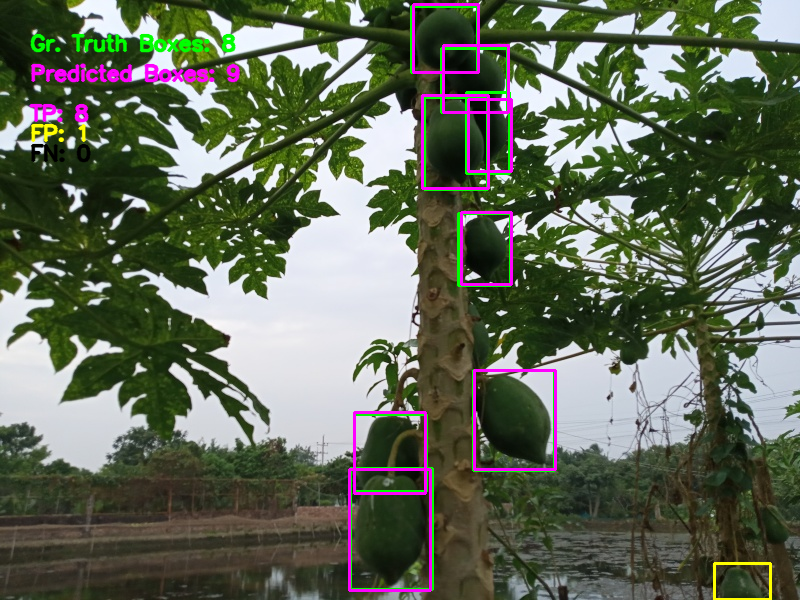

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/50.jpg')

gtb_color = (0, 255, 0)
thickness = 2
for dimension in ground_truth_boxes:
  img = cv2.rectangle(img, tuple([math.ceil(i) for i in dimension[:2]]), tuple([math.ceil(i) for i in dimension[2:]]), gtb_color, thickness)

# pb_color = (255, 0, 255)
for dimension in tp:
  img = cv2.rectangle(img, tuple([math.ceil(i) for i in dimension[:2]]), tuple([math.ceil(i) for i in dimension[2:]]), pb_color, thickness)

for dimension in fp:
  img = cv2.rectangle(img, tuple([math.ceil(i) for i in dimension[:2]]), tuple([math.ceil(i) for i in dimension[2:]]), (0, 255, 255), thickness)

# for dimension in fn:
#   img = cv2.rectangle(img, tuple([math.ceil(i) for i in dimension[:2]]), tuple([math.ceil(i) for i in dimension[2:]]), (0,0,0), thickness)


font = cv2.FONT_HERSHEY_SIMPLEX
gtb_org = (30, 50)
pb_org = (30, 80)
fontScale = .7
color = (255, 0, 0)
thickness = 2
img = cv2.putText(img, 'Gr. Truth Boxes: '+str(len(ground_truth_boxes)), gtb_org, font,  fontScale, gtb_color, thickness, cv2.LINE_AA)
img = cv2.putText(img, 'Predicted Boxes: '+str(len(predicted_boxes)), pb_org, font,  fontScale, pb_color, thickness, cv2.LINE_AA)
img = cv2.putText(img, 'TP: '+str(TP), (30, 120), font,  fontScale,  (255, 0, 255), 2, cv2.LINE_AA)
img = cv2.putText(img, 'FP: '+str(FP), (30, 140), font,  fontScale,  (0, 255, 255), 2, cv2.LINE_AA)
img = cv2.putText(img, 'FN: '+str(FN), (30, 160), font,  fontScale,  (0, 0, 0), 2, cv2.LINE_AA)
cv2_imshow(img)
#cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/50_modified.jpg', img)

In [ ]:
from collections import defaultdict

import numpy as np
from collections import defaultdict

# Define a function to calculate the IoU (Intersection over Union) between two bounding boxes
def calculate_iou(boxA, boxB):
    # boxA and boxB are in the format [x1, y1, x2, y2]
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    inter_area = max(0, xB - xA +1) * max(0, yB - yA +1)

    boxA_area = (boxA[2] - boxA[0] +1) * (boxA[3] - boxA[1] +1)
    boxB_area = (boxB[2] - boxB[0] +1) * (boxB[3] - boxB[1] +1)

    iou = inter_area / float(boxA_area + boxB_area - inter_area)

    return iou

# Define ground truth and predicted labels for each bounding box (as examples)
ground_truth = [
    {'box': [10, 20, 50, 70], 'class': 'car'},
    {'box': [30, 40, 80, 90], 'class': 'person'},
    {'box': [60, 70, 100, 120], 'class': 'car'},
    # Add more ground truth annotations as needed
]

predicted = [
    {'box': [15, 25, 45, 75], 'class': 'car', 'confidence': 0.8},
    {'box': [35, 45, 75, 85], 'class': 'person', 'confidence': 0.7},
    {'box': [65, 75, 105, 115], 'class': 'car', 'confidence': 0.6},
    # Add more predicted annotations as needed
]

# Set up variables for TP, FP, FN for each class
true_positives = defaultdict(int)
false_positives = defaultdict(int)
false_negatives = defaultdict(int)

# Define the IoU threshold for considering a detection as true positive
iou_threshold = 0.5

# Loop through each predicted box and calculate TP, FP, FN for each class
for pred in predicted:
    pred_box = pred['box']
    pred_class = pred['class']
    pred_confidence = pred['confidence']
    max_iou = 0
    max_iou_idx = -1

    for idx, gt in enumerate(ground_truth):
        gt_box = gt['box']
        gt_class = gt['class']

        if gt_class != pred_class:
            continue

        iou = calculate_iou(pred_box, gt_box)
        if iou > max_iou:
            max_iou = iou
            max_iou_idx = idx

    if max_iou >= iou_threshold:
        if ground_truth[max_iou_idx]['class'] == pred_class:
            true_positives[pred_class] += 1
        else:
            false_positives[pred_class] += 1
    else:
        false_positives[pred_class] += 1

# Calculate false negatives for each class
for gt in ground_truth:
    gt_class = gt['class']
    found_match = False

    for pred in predicted:
        if gt_class == pred['class'] and calculate_iou(gt['box'], pred['box']) >= iou_threshold:
            found_match = True
            break

    if not found_match:
        false_negatives[gt_class] += 1

# Display the TP, FP, FN for each class
print("True Positives:")
print(dict(true_positives))
print("False Positives:")
print(dict(false_positives))
print("False Negatives:")
print(dict(false_negatives))


True Positives:
{'car': 2, 'person': 1}
False Positives:
{}
False Negatives:
{}


## **For YOLO Model**

Create Test CSV file:

In [ ]:
# import required module
import os
import csv
# assign directory
test_label_directory = '/content/drive/MyDrive/MScThesis/YOLOv8/Old_415_papaya_data/Org_Gaussian___Org/data/test/labels'

all_boxes = [['filename','class','xmin','ymin','xmax','ymax']]
for filename in os.listdir(test_label_directory):
  file = os.path.join(test_label_directory, filename)
  if os.path.isfile(file):
    my_file = open(file, "r")
    for line in my_file:
      spitted_line = line[:-1].split(' ')
      x = [float(x) for x in spitted_line[1:]]
      box = [x[0]*800-x[2]*800/2, x[1]*600-x[3]*600/2, x[0]*800+x[2]*800/2, x[1]*600+x[3]*600/2]
      box = [filename[:-4]]+[spitted_line[0]]+box
      all_boxes.append(box)
  # break

test_csv_directory = '/content/drive/MyDrive/MScThesis/YOLOv8/Old_415_papaya_data/Org_Gaussian___Org/output/Test_labels_yolo_Org_Gaussian___Org.csv'
with open(test_csv_directory, mode ='w')as file:
    csvFile = csv.writer(file)
    csvFile.writerows(all_boxes)

Create Predict CSV file:

In [3]:
# import required module
import os
import csv
# assign directory
test_label_directory = '/content/drive/MyDrive/MScThesis/YOLOv8/Old_415_papaya_data/Org_Gaussian___Org/output/predict/labels'

all_boxes = [['filename','class','xmin','ymin','xmax','ymax']]
for filename in os.listdir(test_label_directory):
  file = os.path.join(test_label_directory, filename)
  if os.path.isfile(file):
    my_file = open(file, "r")
    for line in my_file:
      spitted_line = line[:-1].split(' ')
      x = [float(x) for x in spitted_line[1:]]
      box = [x[0]*800-x[2]*800/2, x[1]*600-x[3]*600/2, x[0]*800+x[2]*800/2, x[1]*600+x[3]*600/2]
      box = [filename[:-4]]+[spitted_line[0]]+box
      all_boxes.append(box)
  # break

test_csv_directory = '/content/drive/MyDrive/MScThesis/YOLOv8/Old_415_papaya_data/Org_Gaussian___Org/output/Predict_labels_yolo_Org_Gaussian___Org.csv'
with open(test_csv_directory, mode ='w')as file:
    csvFile = csv.writer(file)
    csvFile.writerows(all_boxes)